# Campo Elétrico e Potencial Elétrico

Primeiro Vamos importar os dados


In [1]:
import pandas as pd
import numpy as np

data = pd.read_excel('Campo-Eletrico.xlsx',sheet_name='Dados')

#MEDIDAS QUANDO D = 10 cm
E1 = data['E (kV/m)'].values
eE1 = data['eE (kV/m)'].values
#E1=E1*10
#eE1=eE1*10
V = data['U (V)'].values
eV=data['eU (V)'].values
V=V+0.89

#MEDIDAS QUANDO D = 5 cm
E11 = data['E1 (kV/m)'].values
eE11 = data['eE1 (kV/m)'].values
#E11=E11*10
#eE11=eE11*10
V11 = data['U1 (V)'].values
eV11=data['eU1 (V)'].values
V11=V11+0.43
#OUTRO EXPERIMENTO 
d = data['d (cm)'].values
ed = data['ed (cm)'].values
#Medidas quando U = 200 V
E2 = data['E2 (kV/m)'].values
eE2 = data['eE2 (kV/m)'].values
#Medidas quando U=150V
E22 = data['E22 (kV/m)'].values
eE22 = data['eE22 (kV/m)'].values
#Medidas quando U = 100 V
E23 = data['E23 (kV/m)'].values
eE23 = data['eE23 (kV/m)'].values

Agora que importamos dados podemos analisar os primeiros dados de Campo e Potencial.

Lembrando que $\vec{E} = -\vec{\nabla} V$, caso peguemos o vetor em uma dimensão, podemos simplificar para 

$E = -\frac{dV}{dx}$, com matemágica

$V = - \int E dx$.

Caso tenha Campo Elétrico Uniforme à uma distância $L$ de sua fonte,

$\boxed{V = -EL}.$


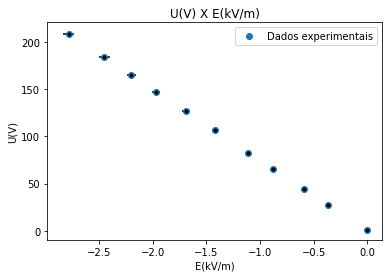

In [2]:
from matplotlib import pyplot as plt

plt.plot(E1,V,'o',label='Dados experimentais')
plt.errorbar(E1,V,yerr=eV,xerr=eE1,fmt='.k')

plt.xlabel('E(kV/m)')
plt.ylabel('U(V)')
plt.title('U(V) X E(kV/m)')
plt.legend()
plt.savefig('graph-data-UXE.png')

Assim, caso varie Potencial Elétrico, posso fazer uma reta que melhor relaciona dados do tipo $V = C_1E+C_2$

Fit Parameter: C_1 = -74.951+-0.153
C_2 = 0.0+-0.25


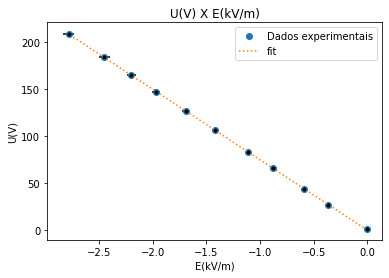

In [3]:
from scipy.optimize import curve_fit
import scipy.integrate as integrate

plt.plot(E1,V,'o',label='Dados experimentais')
plt.errorbar(E1,V,yerr=eV,xerr=eE1,fmt='.k')

def curve2(x,A,B):
    return A*x+B
popt, pcov = curve_fit(curve2, E1, V)
#para calcular erro
std = np.sqrt(np.diag(pcov))
#mostrar coeficientes obtidos
print(f'Fit Parameter: C_1 = {round(popt[0],3)}+-{round(std[0],3)}')
print(f'C_2 = {round(popt[1],2)}+-{round(std[1],2)}')
#fazer novo gráfico

#plt.plot(i,m,'o',label='Dados experimentais')
#plt.errorbar(i,m,yerr=em,xerr=ei,fmt='.k')
x=np.linspace(0,3.2,100)
plt.plot(E1,popt[0]*E1+popt[1],':',label='fit')

plt.xlabel('E(kV/m)')
plt.ylabel('U(V)')
plt.title('U(V) X E(kV/m)')
plt.legend()
plt.savefig('graph-fit-UXE.png')

Lembrando a Teoria, posso dizer que

$C_1 = -L$,

$C_2 = 0$.

Então sabendo os coeficientes posso calcular a distância entre placas

In [4]:
L = popt[0]/10
eL = std[0]/10
print(f'L = {round(abs(L),2)}+-{round(eL,2)} cm')

L = 7.5+-0.02 cm


# Entender erro

Como uma das placas estava levemento torta, posso dizer que o campo não será mais uniforme e pela inclinação, ele deve ter uma componente na vertical. Assim, posso tentar fazer um novo modelo de Campo Elétrico em função da posição vertical, mas para isso primeiro vou olhar os dois dados e ver se existe uma diferença clara

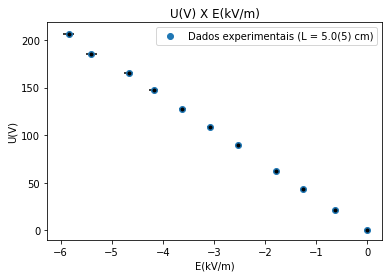

In [5]:
from scipy.optimize import curve_fit
import scipy.integrate as integrate

#plt.plot(E1,V,'o',label='Dados experimentais (L = 10.0(5) cm)')
#plt.errorbar(E1,V,yerr=eV,xerr=eE1,fmt='.k')
plt.plot(E11,V11,'o',label='Dados experimentais (L = 5.0(5) cm)')
plt.errorbar(E11,V11,yerr=eV11,xerr=eE11,fmt='.k')


plt.xlabel('E(kV/m)')
plt.ylabel('U(V)')
plt.title('U(V) X E(kV/m)')
plt.legend()
plt.savefig('graph-both-UXE.png')

Posso calcular o coeficiente angular da melhor reta que as descreve

In [6]:
def curve2(x,A,B):
    return A*x+B
popt, pcov = curve_fit(curve2, E11, V11)
#para calcular erro
std = np.sqrt(np.diag(pcov))
#CAso em que L = 5 cm
L1 = popt[0]/10
eL1 = std[0]/10
print(eL1*1.44)
print(f'L deveria ser 10 cm mas é {round(L/10,2)} cm')
print(f'L deveria ser 5 cm mas é {round(L1,2)} cm')

0.03806256443098513
L deveria ser 10 cm mas é -0.75 cm
L deveria ser 5 cm mas é -3.51 cm


In [7]:
b = 10/L
b1=5/L1

Como os campos tem fator em comum, posso dizer que em fato o campo medido vezes uma constante que depende do ângulo que está inclinado, ou seja, $E_{medido} = E_T*K$ e como sabemos que podemos ter uma projeção, podemos dizer que

$E_{T}\sin \beta = E_{medido}$

Então, na fórmla que usavamos, $V= -E_{T}L $, e adicionamos uma constante, teremos

$\boxed{V =- E_{medido} \frac{L}{10 \sin \beta}} $

Com experimento de antes medidos o K, então podemos descobrir que ângulo é esse

In [8]:
beta = np.arcsin(abs(b)/10)
print(f'{beta} rad')
print(f'{beta*360/(2*np.pi)} graus')

0.1338194734625817 rad
7.6672910460688515 graus


Usando o Tracker na foto tirada do setup, foi possível ver que o ângulo de inclinação foi de 

$\beta \approx 7.5 $ graus

In [9]:
alpha = 7.5*np.pi*2/360

print(L*np.sin(alpha)*10)
print(eL*np.sin(alpha)*10)

-9.783073708505935
0.020015931584547852


# Capacitância

Posso calcular o Campo Elétrico gerado entre placas usando Lei de Gauss ao supor região gaussiana de cubo

$E2A = \frac{Q}{\epsilon_0} \implies \boxed{E = \frac{Q}{2A \epsilon_0}}.$

Como cada Placa vai gerar esse campo, posso supor que entre as placas

$\boxed{E = \frac{Q}{\epsilon_0A}}$.

Capacitância é definida como $C = \frac{Q}{V}$ , sabemos pela equação acima que $Q = E\epsilon_0 A$, assim posso dizer que 

$C = \frac{E\epsilon_0 A}{V} $,

pela equação anterior sei que $\frac{E}{V} = \frac{1}{C_1}$, então sei que

$\boxed{C = \frac{\epsilon_0 A}{C_1}}$

In [10]:
e0=8.85*10**(-12)
Ar=0.08009 #em metros quadrados
eAr=0.00002
Ca = e0*Ar/9.8
eCa = e0*np.sqrt( (eAr/9.8)**2 + (eL*Ar/(9.8**2))**2 )
print(f'Capacitância é {round(Ca,16)}+-{round(eCa,16)}')

Capacitância é 7.23e-14+-1e-16


# Analisando Potencial Elétrico com distância entre placas

Sabendo Campo Elétrico, posso substituir o Potencial ao fazer $V = - Ed$, ou seja

$\boxed{E = -\frac{V}{d}}$

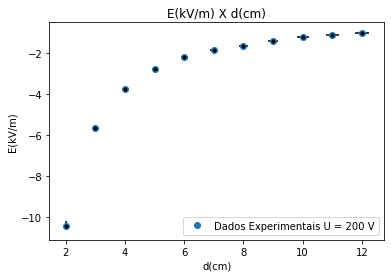

In [39]:
plt.plot(d,E2,'o', label = "Dados Experimentais U = 200 V")
plt.errorbar(d,E2,yerr=eE2,xerr=ed,fmt='.k')

plt.xlabel('d(cm)')
plt.ylabel('E(kV/m)')
plt.title('E(kV/m) X d(cm)')
plt.legend()
plt.savefig('graph-data-EXd.png')

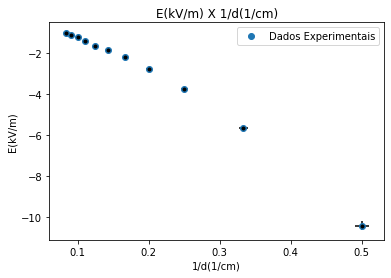

In [12]:
d1 = np.ones(len(d))
ed1 = np.ones(len(d))

for i in range(len(d)):
    d1[i]= 1/d[i]
    ed1[i]= ed[i]/(d[i]**2)

plt.plot(d1,E2,'o', label = "Dados Experimentais")
plt.errorbar(d1,E2,yerr=eE2,xerr=ed1,fmt='.k')

plt.xlabel('1/d(1/cm)')
plt.ylabel('E(kV/m)')
plt.title('E(kV/m) X 1/d(1/cm)')
plt.legend()
plt.savefig('graph-data-EXd1.png')


Podemos tentar fitar para uma reta do tipo $E = C_2 1/d + C_3$

Fit Parameter: C_2 = -21.9+-0.994
C_3 = 1.18+-0.23


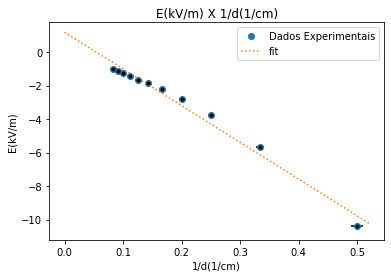

In [13]:
plt.plot(d1,E2,'o', label = "Dados Experimentais")
plt.errorbar(d1,E2,yerr=eE2,xerr=ed1,fmt='.k')

def curve2(x,A,B):
    return A*x+B
popt, pcov = curve_fit(curve2, d1, E2)
#para calcular erro
std = np.sqrt(np.diag(pcov))
#mostrar coeficientes obtidos
print(f'Fit Parameter: C_2 = {round(popt[0],3)}+-{round(std[0],3)}')
print(f'C_3 = {round(popt[1],2)}+-{round(std[1],2)}')
#fazer novo gráfico

#plt.plot(i,m,'o',label='Dados experimentais')
#plt.errorbar(i,m,yerr=em,xerr=ei,fmt='.k')
x=np.linspace(0,0.52,100)
plt.plot(x,popt[0]*x+popt[1],':',label='fit')

plt.xlabel('1/d(1/cm)')
plt.ylabel('E(kV/m)')
plt.title('E(kV/m) X 1/d(1/cm)')
plt.legend()
plt.savefig('graph-fit-EXd1.png')

Comparando duas equações podemos dizer que $C_2 = V$

In [14]:
print(f'V = {popt[0]*10}+-{std[0]*10} V')

V = -219.00253581298415+-9.944836006168776 V


# Plotando Para dois casos de U

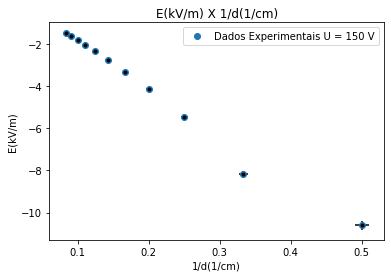

In [32]:
plt.plot(d1,E22,'o', label = "Dados Experimentais U = 150 V")
plt.errorbar(d1,E22,yerr=eE22,xerr=ed1,fmt='.k')

plt.xlabel('1/d(1/cm)')
plt.ylabel('E(kV/m)')
plt.title('E(kV/m) X 1/d(1/cm)')
plt.legend()
plt.savefig('graph-fit-E22Xd1.png')

In [36]:
def curve2(x,A,B):
    return A*x+B
popt, pcov = curve_fit(curve2, d1[:-1], E22[:-1])
#para calcular erro
std = np.sqrt(np.diag(pcov))
#mostrar coeficientes obtidos
print(f' V = {round(popt[0]*10,0)}+-{round(std[0]*10,0)} V')

 V = -232.0+-10.0 V


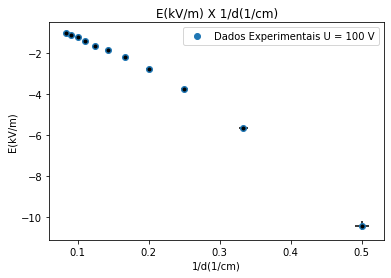

In [37]:
plt.plot(d1,E23,'o', label = "Dados Experimentais U = 100 V")
plt.errorbar(d1,E23,yerr=eE23,xerr=ed1,fmt='.k')

plt.xlabel('1/d(1/cm)')
plt.ylabel('E(kV/m)')
plt.title('E(kV/m) X 1/d(1/cm)')
plt.legend()
plt.savefig('graph-fit-E23Xd1.png')

In [38]:
def curve2(x,A,B):
    return A*x+B
popt, pcov = curve_fit(curve2, d1[:-1], E23[:-1])
#para calcular erro
std = np.sqrt(np.diag(pcov))
#mostrar coeficientes obtidos
print(f'V = {round(popt[0]*10,0)}+-{round(std[0]*10,0)} V')


V = -222.0+-10.0 V
